# Holt Winters Triple Smoothing

~~Based on~~ Stolen from a blog series by Gregory Trubetskoy, found at https://grisha.org/blog/2016/01/29/triple-exponential-smoothing-forecasting/

---

### Presented by:
#### Andy Parkerson - andyparkerson@gmail.com

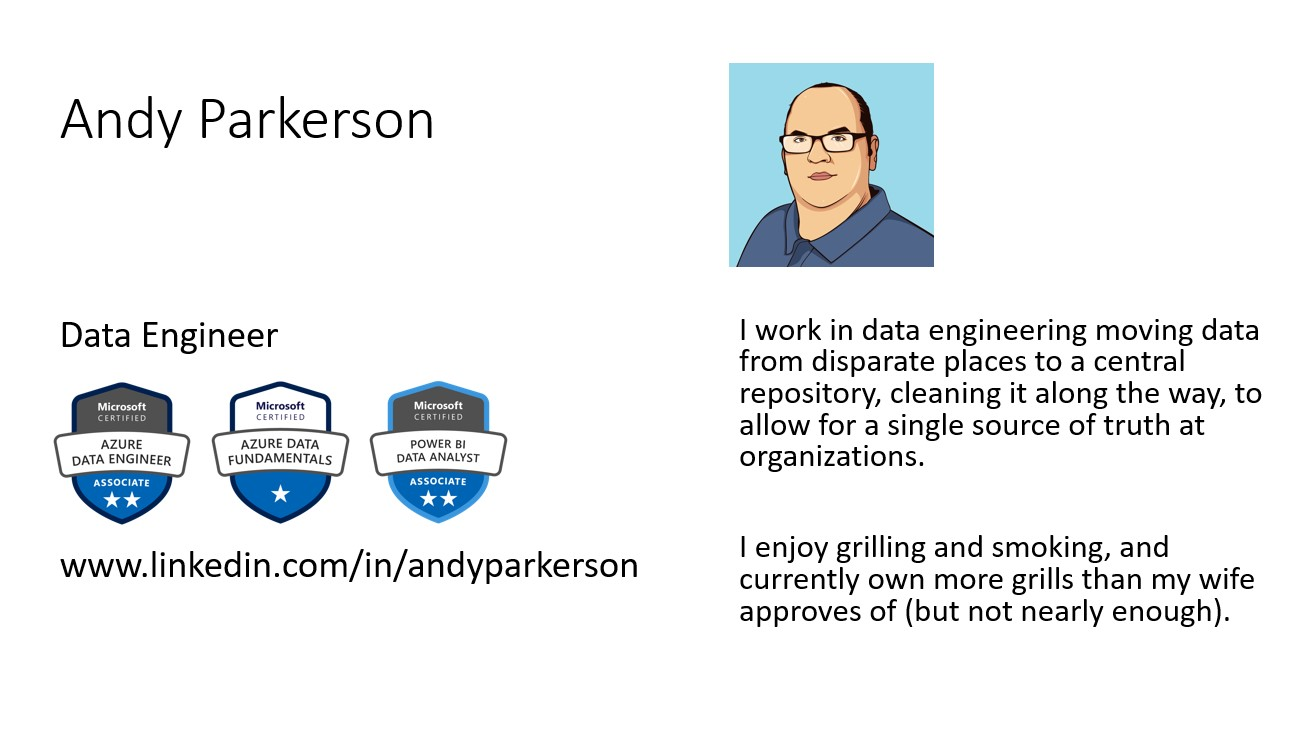

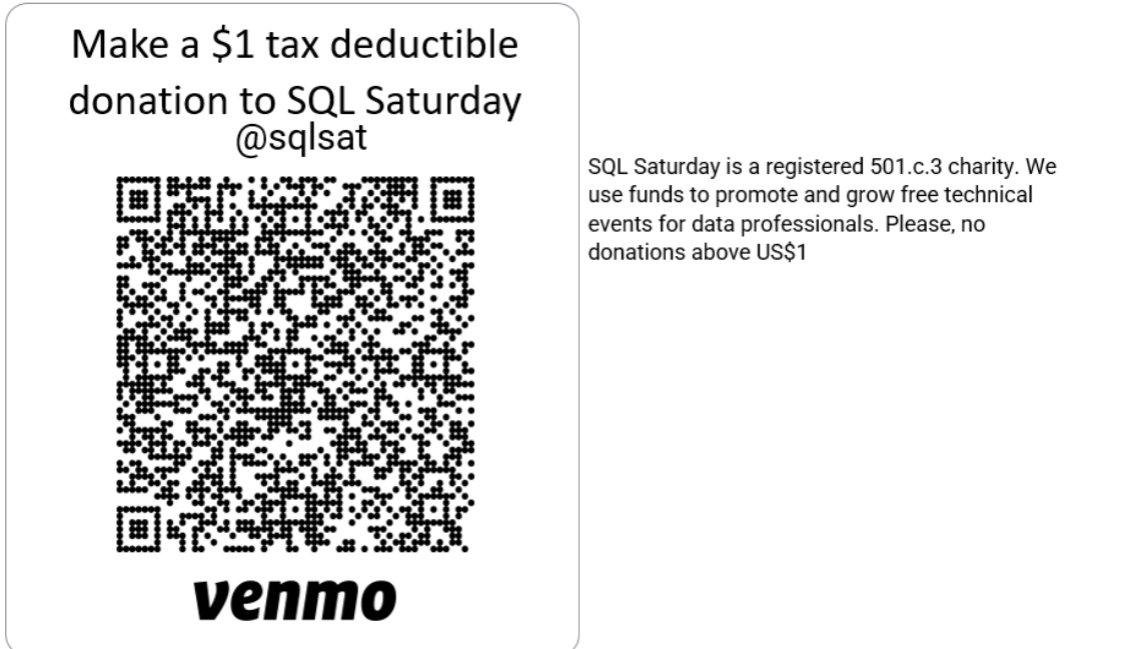

## Single Smoothing
We start with a series of data. These are data points equally spaced in time. This could be 
  * the number of lightning bugs seen each night between 6 and 7pm,
  * how many soldiers were wounded in combat each week,
  * the number of blue Weber Summit II BBQ Grills sold each fortnight.

If there are any zeros they must be included. There can be **no gaps** in the data.

## Our First Example Series

In [1]:
# Our first sample series
series = [3,10,12,13,12,10,12]
series_len = len(series)
series

[3, 10, 12, 13, 12, 10, 12]

 ## Average

 The first way to predict the next value in the series is to take the average (arithmentic mean) of all of the previous values.

In [2]:
def average(series):
    return float(sum(series))/len(series)

In [3]:
avg = average(series)
avg

10.285714285714286

## Moving Average
We can take the average of the last `n` values in the series and use that.

In [4]:
def moving_average(series, n):
    return average(series[-n:])

Combining these two averages gives us the following recursive function:

In [5]:
def average(series, n=None):
    if n is None:
        return average(series, len(series))
    return float(sum(series[-n:]))/n

In [6]:
avg_running3 = moving_average(series, 3)
avg_running3

11.333333333333334

In [7]:
avg_running4 = average(series, 4)
avg_running4

11.75

## Weighted Average
We can favor certain values in a moving average with a set of weights. 

**NOTE:** It is very important that these weights add up to 1.

In [8]:
def weighted_average(series, weights):
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series[-n-1] * weights[n]
    return result

In [9]:
avg_weighted = weighted_average(series, [0.1, 0.2, 0.3, 0.4])
avg_weighted

11.500000000000002

In [10]:
# Here is how you graph things in Python. Well, it's how *I* graph things in Python.
import matplotlib.pyplot as plt
def plot1(plt, series, series_len, avg, avg_running4, avg_weighted):
    %matplotlib inline
    fig=plt.figure(figsize=(30,10))
    plt.plot(series)
    plt.plot([series_len - 1, series_len], [series[series_len - 1], avg], linestyle='--', color='red')
    plt.scatter(series_len, avg, color='red', label='average')
    plt.annotate('average', [7.3, average(series)], verticalalignment='center')
    plt.plot([series_len - 1, series_len], [series[series_len - 1], avg_running4], linestyle='--', color='orange')
    plt.scatter(series_len, avg_running4, color='orange')
    plt.annotate('running average', [7.3, avg_running4], verticalalignment='center')
    plt.plot([series_len - 1, series_len], [series[series_len - 1], avg_weighted], linestyle='--', color='green')
    plt.scatter(series_len, avg_weighted, color='green')
    plt.annotate('weighted average', [7.3, avg_weighted], verticalalignment='center')
    plt.xlim(0, series_len+1)
return plt.show()

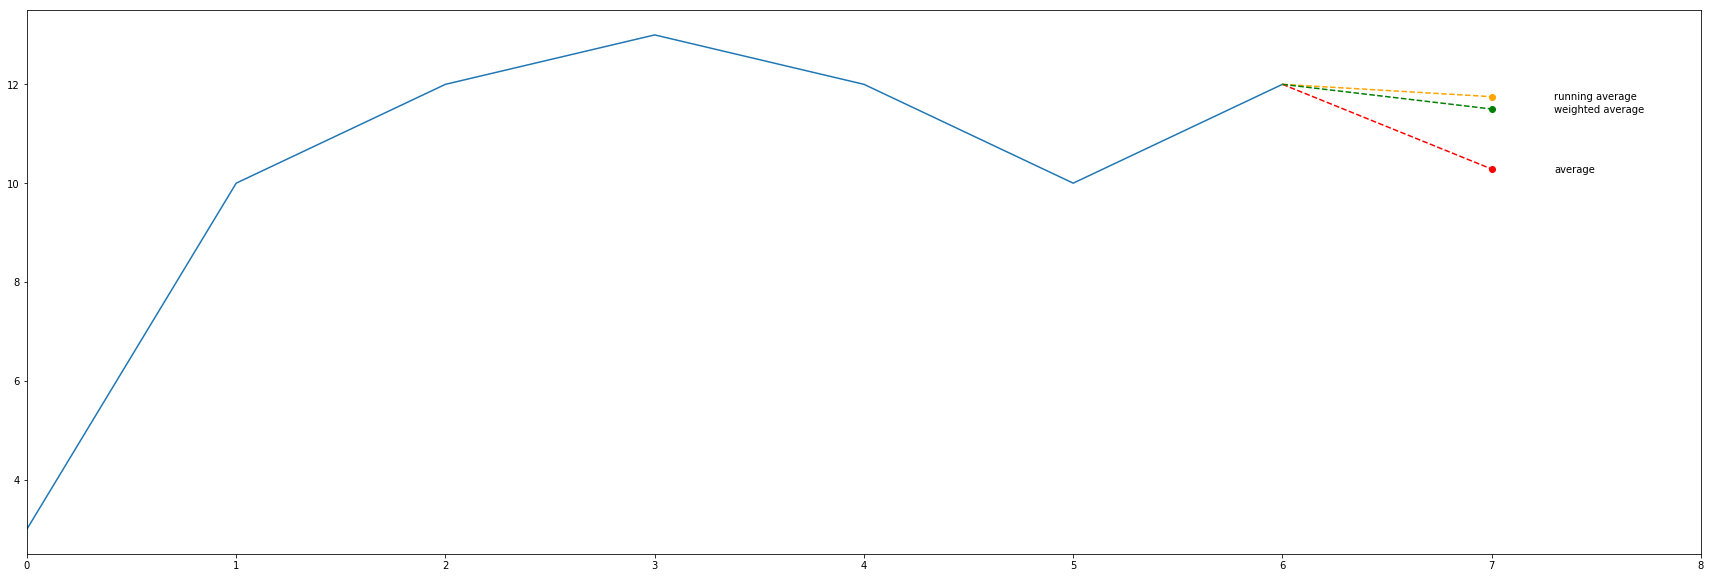

In [11]:
plot1(plt, series, series_len, avg, avg_running4, avg_weighted)

## Single Exponential Smoothing
Consider if the weighted average looked at **all** of the data points. Of course, getting the weights to all add up to 1 would be tricky. How do we accomplish this? Like this:

$$ \hat y_x = \alpha\cdot y_x + (1 - \alpha)\cdot\hat y_{x-1} $$

Expanding this a once yields
$$ \hat y_x = \alpha\cdot y_x + (1-\alpha)\biggl(\alpha\cdot y_{x-1} + (1-\alpha)\cdot\hat y_{x-2}\biggr) $$
And again 
$$ \hat y_x = \alpha\cdot y_x + (1-\alpha)\biggl(\alpha\cdot y_{x-1} + (1-\alpha)\biggl(\alpha\cdot y_x + (1-\alpha)\biggl(\alpha\cdot y_{x-2} + (1-\alpha)\cdot\hat y_{x-3}\biggr)\biggr)\biggr) $$


Adding the coefficients gives us
$$\alpha + (1-\alpha)\biggl(\alpha + (1-\alpha)\biggl(\alpha + (1-\alpha)\biggl(\alpha + (1-\alpha)\biggr)\biggr)\biggr) = 1$$

So you see you can go as far back as you like, and you still get the weights to sum to 1.

As $(1-\alpha)$ is multiplied by itself repeatedly, this expression is _exponential_.

Furthermore, you see that the larger $\alpha$ is, the smaller the weights on previous data points gets. We can call it the _memory decay rate_.

In [12]:
# given a series and alpha, return series of smoothed points
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [13]:
smooth1 = exponential_smoothing(series, 0.1)
smooth1

[3, 3.7, 4.53, 5.377, 6.0393, 6.43537, 6.991833]

We use the last value of the smoothed series as a prediction of the next value.

In [14]:
smooth1.append(smooth1[-1])
smooth1

[3, 3.7, 4.53, 5.377, 6.0393, 6.43537, 6.991833, 6.991833]

In [15]:
smooth9 = exponential_smoothing(series, 0.9)
smooth9.append(smooth9[-1])
smooth9

[3, 9.3, 11.73, 12.873000000000001, 12.0873, 10.20873, 11.820873, 11.820873]

In [16]:
def plot2(plt, series, series_len, smooth1, smooth9):
    %matplotlib inline
    fig=plt.figure(figsize=(30,10))
    plt.plot(series)
    plt.plot(smooth1, linestyle='--', color='green')
    plt.scatter(series_len, smooth1[-1], color='green')
    plt.annotate('$alpha=0.1$', [7.3, smooth1[-1]], verticalalignment='center')
    plt.plot(smooth9, linestyle='--', color='red')
    plt.scatter(series_len, smooth9[-1], color='red')
    plt.annotate('$alpha=0.9$', [7.3, smooth9[-1]], verticalalignment='center')
    plt.xlim(0, series_len+1)
return plt.show()

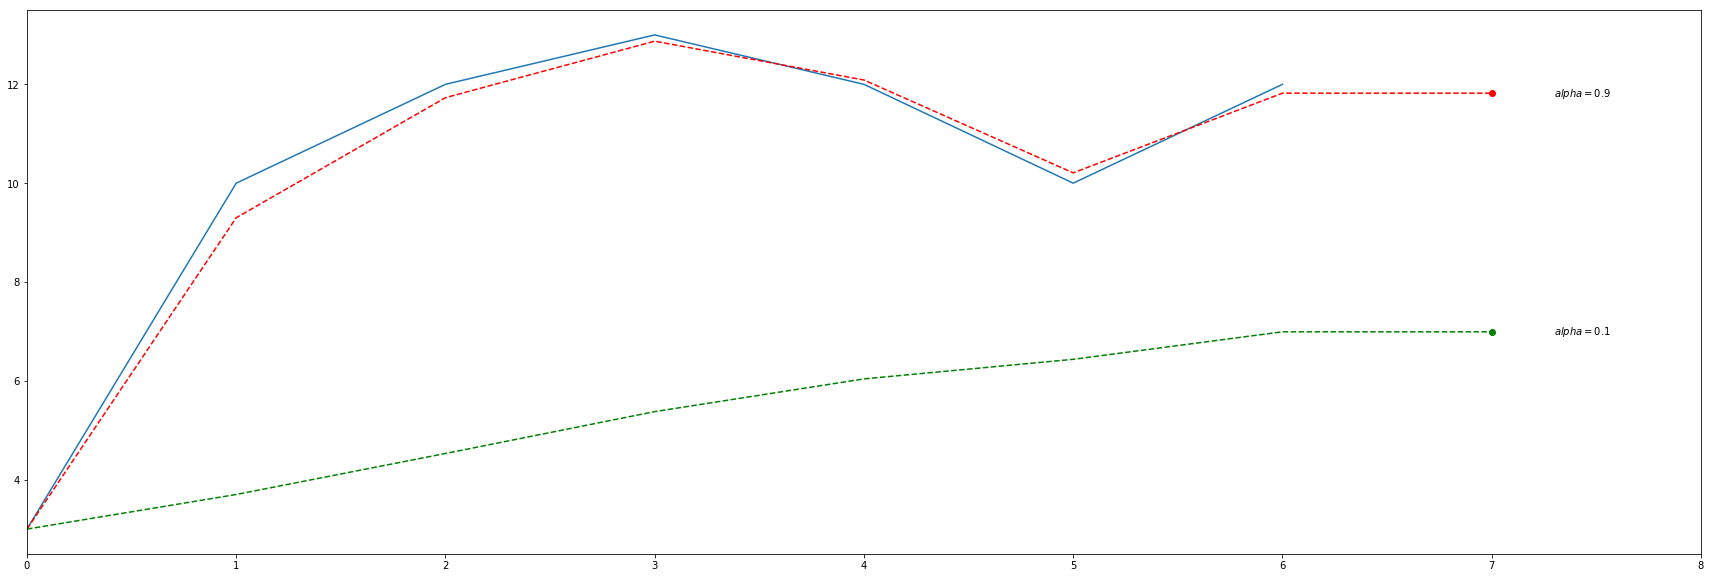

In [17]:
plot2(plt, series, series_len, smooth1, smooth9)

### Level
The expected value is referred to as the _level_, denoted as $\ell$.

### Trend
The slope 

$$ m = \frac{\Delta y}{\Delta x} $$ 

is referred to as the _trend_.

Also, since *m* doesn't stand for anything, let's refer to it as *b*, which also doesn't stand for anything.

**Note:** In the time series the data are spaced equally apart. thus $\Delta x = 1$, so the trend is just $b = \Delta y = y_x - y_{x-1}$.

$$ b = y_x - y_{x-1} $$

## Double Smoothing

Now we can look at using our single smoothing method on the level. Because $\hat y_{x-1} = \ell_{x-1} + b_{x-1}$, we can get

$ \ell_x = \alpha y_x + (1-\alpha)(\ell_{x-1}+b_{x-1}) $

And because the trend at $x$ is $\ell_x - \ell_{x-1}$, we can get

$ b_x = \beta(\ell_x - \ell_{x-1}) + (1-\beta)b_{x-1}$.

Finally, the forecast is just the level plus the trend, or 

$ \hat y_{x+1} = \ell_{x} + b_{x} $


In [18]:
# given a series and alpha, return series of smoothed points
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # we are forecasting
          value = result[-1]
        else:
          value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

In [19]:
dsmooth99 = double_exponential_smoothing(series, 0.9, 0.9)
dsmooth99

[3,
 17.0,
 15.45,
 14.210500000000001,
 11.396044999999999,
 8.183803049999998,
 12.753698384500002,
 13.889016464000003]

Once again, we use the level and trend to forecast an addition point.

In [20]:
dsmooth99.append(dsmooth99[-1]+(dsmooth99[-1]-dsmooth99[-2]))
dsmooth99

[3,
 17.0,
 15.45,
 14.210500000000001,
 11.396044999999999,
 8.183803049999998,
 12.753698384500002,
 13.889016464000003,
 15.024334543500004]

In [21]:
def plot3(plt, series, series_len, dsmooth99):
    %matplotlib inline
    fig=plt.figure(figsize=(30,10))
    plt.plot(series, marker='o')
    plt.plot(dsmooth99, marker='o', linestyle='--', color='green')
    plt.annotate('$alpha=0.9, beta=0.9$', [series_len + 1.3, dsmooth99[-1]], verticalalignment='center')
    plt.plot(smooth9, marker='o', linestyle='--', color='red')
    plt.annotate('$alpha=0.9$', [series_len + 0.3, smooth9[-1]], verticalalignment='center')
    plt.xlim(0, series_len+2)
return plt.show()

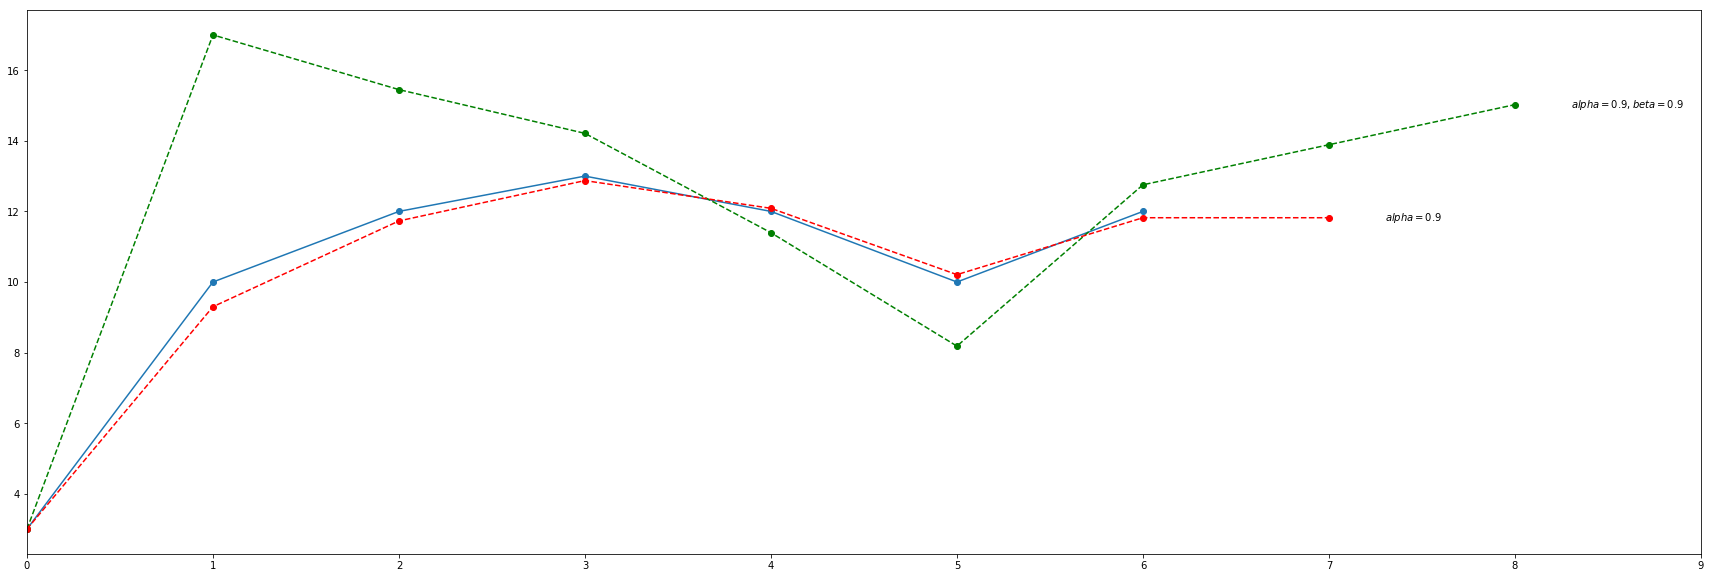

In [22]:
plot3(plt, series, series_len, dsmooth99)

### Season
Sometimes the data seems to repeat itself at regular intervals:
  * July is always hot, 
  * Lots of taco sales on Tuesday, 
  * Not much electricity use at midnight.

When this is the case, we call that interval the **season**. 

**Note:** Triple Smoothing requires seasonality.

### Season Length
The length of the season is the **season length**, denoted by $L$. There are ways to determine this if you don't already know it, but they are hard and you usually already know it, so let's assume that you already know it.

### Seasonal Component
How much seasonality effects the data is the **seasonal component**. Each point in the season has such a component. If the season length is 12, then there are 12 seasonal components. We use *s* to denote the seasonal component.

## Triple Smoothing (Holt-Winters Method)

We want to apply the exponential smoothing to the seasonal commponents in addition to level and trend. This gives us

$$ \ell_x = \alpha(y_x - s_{x-L}) + (1-\alpha)(\ell_{x-1} + b_{x-1}) $$

$$ b_{x} = \beta(\ell_x-\ell_{x-1}) + (1-\beta)b_{x-1} $$

$$ s_x = \gamma(y_{x}-\ell_{x})+(1-\gamma)s_{x-L} $$

$$ \hat y_{x+m} = \ell_{x}+mb_{x}+s_{x-L+1+(m-1)\textrm{mod}L} $$



Note that $m$ can be any positive integer. So we can forecast as far into the future as we desire.

# Our Second Example Series

In [23]:
series = [30,21,29,31,40,48,53,47,37,39,31,29,17,9,20,24,27,35,41,38, 
          27,31,27,26,21,13,21,18,33,35,40,36,22,24,21,20,17,14,17,19,
          26,29,40,31,20,24,18,26,17,9,17,21,28,32,46,33,23,28,22,27,
          18,8,17,21,31,34,44,38,31,30,26,32]
series_len = len(series)

In [24]:
def plot4(plt, series, series_len):
    %matplotlib inline
    fig=plt.figure(figsize=(30,10))
    plt.plot(series, marker='o')
    plt.xlim(0, series_len+2)
return plt.show()

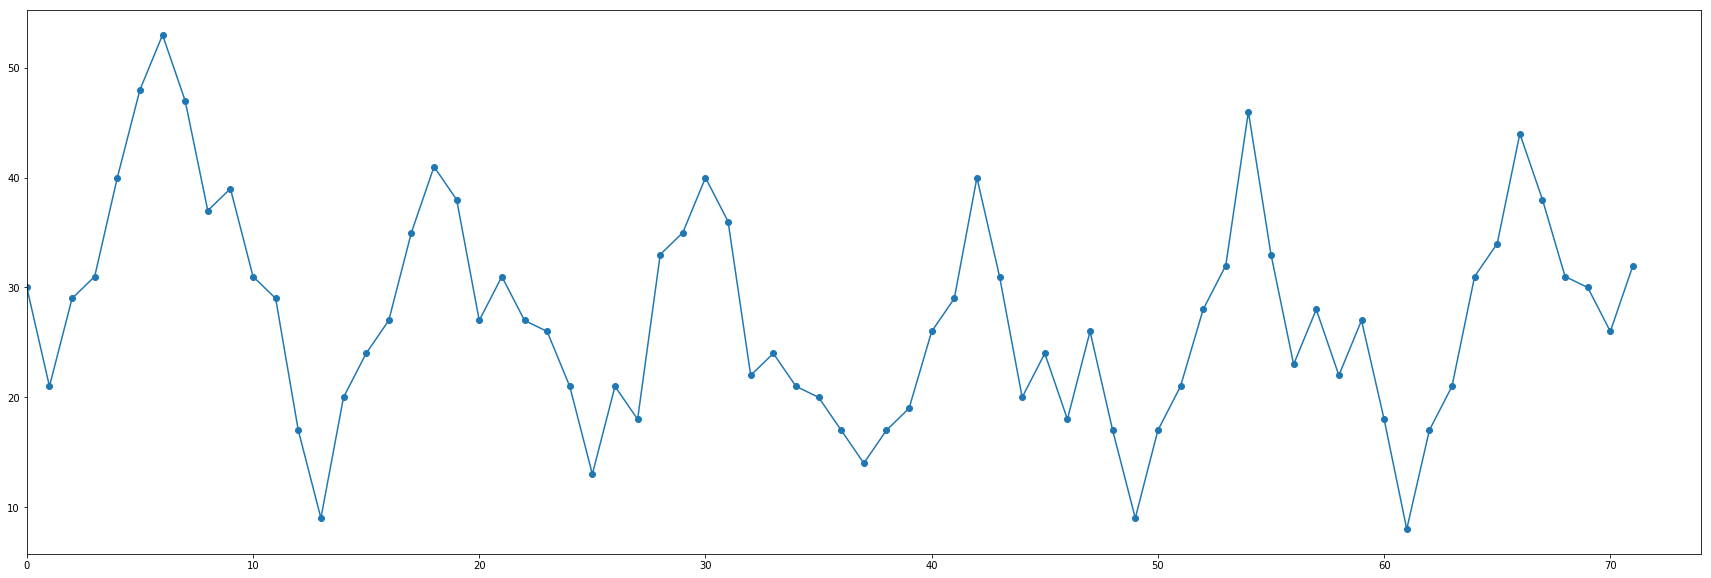

In [25]:
plot4(plt, series, series_len)

### Initial Trend
Instead of just using the first two points for the initial trend like we did in double smoothing, we can take into account the seasonal data.

This is usually done by averaging trends averages across seasons.

$$ b_0 = \frac{1}{L}\biggl(\frac{y_{L+1}-y_1}{L}+\frac{y_{L+2}-y_2}{L}+\cdots+\frac{y_{L+L}-y_{L}}{L}\biggr) $$

In [26]:
def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen
initial_trend(series, 12)

-0.7847222222222222

### Initial Seasonal Components
This is from the _Engineering Statistics Handbook_ published by National Institute of Standards and Technology (NIST).

Get ready, we're about to get involved.

#### Step 1
Compute the averages of each season in the series.

$$ A_p = \frac{\sum^{L}_{i=1}y_i}{L} $$


#### Step 2
Divide the observations by the appropriate yearly average. The number of seasons in our data set is $N$. 

The first data point $y_1$ is divided by the first season average $A_1$.
The second data point $y_2$ is divided by the first season average $A_1$, as it is part of the first season.
The $L+1$ data point $y_{L+1}$ is divided by the second season average $A_2$, as it is part of the second season.
And so forth.

#### Step 3
Add the calculated values according to position in the season, and take the average of the sum. 
$$ I_k = \biggl( \frac{y_k}{A_1} + \frac{y_{L+k}}{A_2} + \cdots + \frac{y_{(N-1)L + k}}{A_n}\biggr) N $$

In [27]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals
initial_seasonal_components(series, 12)

{0: -7.4305555555555545,
 1: -15.097222222222221,
 2: -7.263888888888888,
 3: -5.097222222222222,
 4: 3.402777777777778,
 5: 8.069444444444445,
 6: 16.569444444444446,
 7: 9.736111111111112,
 8: -0.7638888888888887,
 9: 1.902777777777778,
 10: -3.263888888888889,
 11: -0.7638888888888887}

### The Algorithm

In [28]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result
tes = triple_exponential_smoothing(series, 12, 0.716, 0.029, 0.993, 24)

In [29]:
def plot4(plt, series, tes):
    %matplotlib inline
    fig=plt.figure(figsize=(30,10))
    plt.plot(series, marker='o')
    plt.plot([None]*len(series) + tes[-24:], marker='o', linestyle='--', color='green')
    plt.xlim(0, series_len+26)
return plt.show()

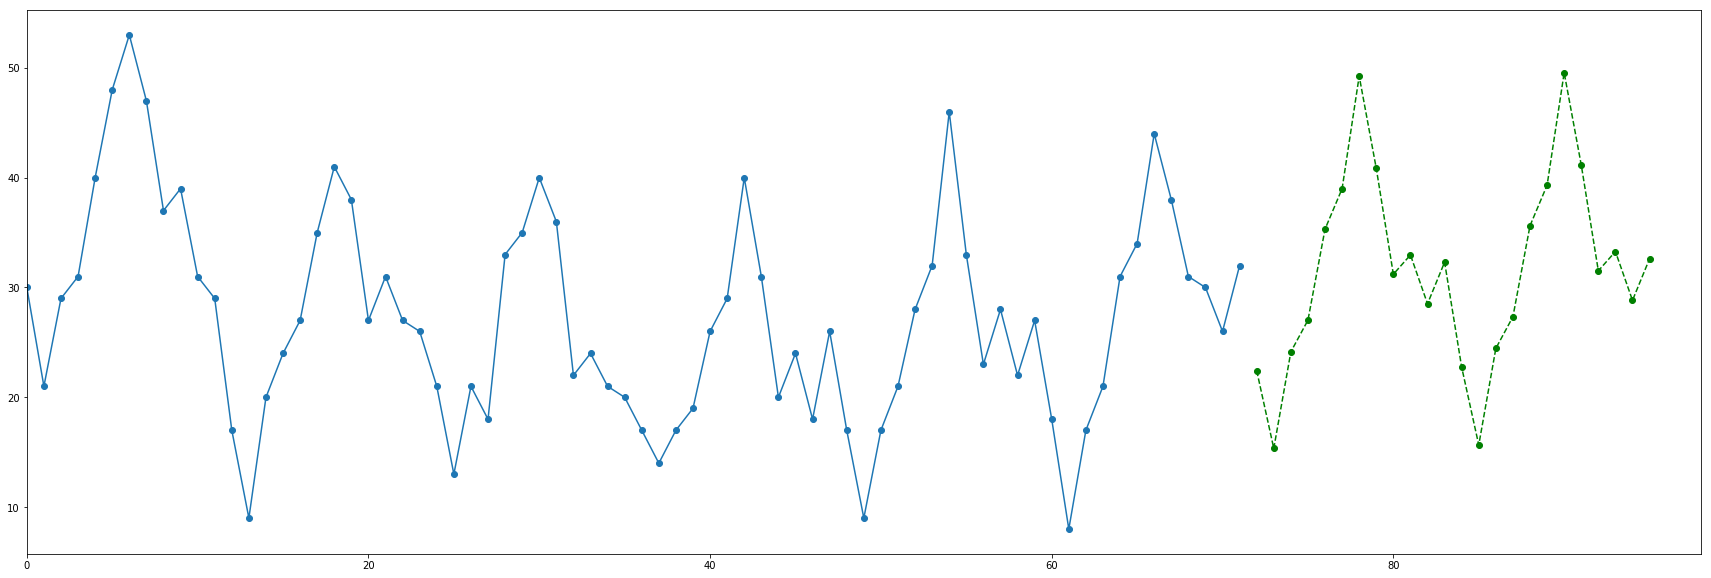

In [30]:
plot4(plt,series, tes)

## Variable Selection / Determination
Where did we come up with 

$$ \alpha = 0.716 $$

$$ \beta = 0.029 $$

$$ \gamma = 0.993 $$

in the above example?

### Sum of Squares of Errors (SSE)

$$ \textrm{SSE} = \sum \biggl(y_{i} - \hat y_{i}\biggr)^2 $$

You can measure how good a fit is by determining how closely the smoothed values correspond with the observed values. That is, how far $\hat y_n$ was from $y_n$. We want to make big errors bad and small errors less bad, so we square each of them. This also gives us the added benefit of making everything nonnegative. So we can then add all of these errors up.

# Minimize SSE

Find variables that minimize the error. But how?

# Optimization Methods
  * Exhaustive Search (Brute Force)
  * Genetic Algorithm (Chromosome)
  * Particle Swarm
  * Nadler-Mead (Simplex0

In [4]:
%%html
<iframe width="900" height="630" src="https://www.youtube.com/embed/3QJjfeVrut8?t=77s" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [3]:
%%html
<iframe width="900" height="630" src="https://www.youtube.com/embed/j2gcuRVbwR0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Thank You
---
#### Andy Parkerson - andyparkerson@gmail.com

#### https://www.linkedin.com/in/andyparkerson/